# How far are we from the goals defined in the Singapore Green Plan 2030?

## Executive Summary

The data analysis for Singapore Local Farm shows that the productivity of the Fish and Vegetable farms was decreasing due to challenging factors such as setting up preventive measures or rising construction costs

The electricity demand for 2025 of 1.5 GWh is a milestone that can be achieved at the rate of the installation for the Solar PV

Local Fish and Vegetable farm owners are facing challenging obstacles to grow their farms however there are avenues to seek assistance 


## Introduction

The Singapore Green Plan 2030 is an initiative that aims to encourage "whole-of-nation" movement and moving towards Singapore's national agenda on sustainable development.

Five ministries [Ministries of Sustainability and the Environment (MSE), Trade and Industry (MTI), Transport (MOT), National Development (MND), and Education(MOE)] are working together with the support by the whole of government to push the initiative with ambitious and concrete targets for a better sustainable future in Singapore.




## Aim of this analysis

This analysis attempts to find out if the target set in the Singapore Green Plan 2030 can be achieved by 2030. 

The focus of this analysis due to time constraint and knowledge constraint is narrow down to two key factors:
- Energy Reset
    - Green Energy
        - 1.5 Gigawatt-peak of electricity generation from solar panel can meet the annual electricity needs for about 260000 households
- Resilient Future
    - Grow Local
        - Build the local production of agri-food industry that can have the capability and capacity to produce 30% of Singapore's nutritional needs locally and sustainably


## Bias in this analysis

The data obtained in this analysis are aggregated data and it is not raw data.


## Environment Setup

In [1]:
import pandas
import database
import bokeh
import seaborn
import matplotlib.pyplot as plt
import etl_processor
from io import StringIO # Refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html for more information about read_json direct json string input deprecation

### Data Preparation

#### Total Final Energy Consumption by Energy Type and Sector

In [2]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe: pandas.DataFrame = pandas.read_json(StringIO(database.extract.TotalFinalEnergyConsumptionByEnergyTypeAndSector().retrieve_data().to_json()))

#### Electricity Generation by Monthly data

In [3]:
electricity_generation_by_month_dataframe: pandas.DataFrame = pandas.read_json(StringIO(database.extract.ElectricityGenerationMonthlyData().retrieve_data().to_json()))

#### Electricity Generation and Consumption

In [4]:
electricity_generation_and_consumption_by_month_dataframe: pandas.DataFrame = pandas.read_json(StringIO(database.extract.ElectricityGenerationAndConsumptionByMonth().retrieve_data().to_json()))

#### Peak System Demand from 2005 to Jul 2021

In [5]:
peak_system_demand_dataframe: pandas.DataFrame = pandas.read_json(StringIO(database.extract.PeakSystemDemand().retrieve_data().to_json()))

#### Solar PV Installations by URA Planning Region

In [6]:
solar_pv_installations_by_ura_planning_region_dataframe: pandas.DataFrame = etl_processor.csv_file_data_source.retrieve_data_for_solar_pv_installations_by_ura_planning_region()

#### Local Production Annual

In [7]:
local_food_production_annual_dataframe: pandas.DataFrame = pandas.read_json(StringIO(database.extract.LocalFoodProduction().retrieve_data().to_json()))


#### Licensed Local Food Farm

In [8]:
licensed_local_food_farm_dataframe: pandas.DataFrame = pandas.read_json(StringIO(database.extract.LicensedLocalFoodFarm().retrieve_data().to_json()))

#### Household Electricty Consumption By Dwelling Type

In [9]:
household_electricity_consumption_by_dwelling_type_dataframe:pandas.DataFrame = etl_processor.excel_file_data_source.retrieve_data_for_household_electricity_consumption_by_dwelling_type()

### Five Number Summary

In [10]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe.describe()

,year,consumption_ktoe
count,380.000000,380.000000
mean,2014.855263,482.777105
std,3.685184,1236.994109
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2015.000000,0.800000
75%,2018.000000,170.225000
max,2021.000000,7611.100000


In [11]:
electricity_generation_by_month_dataframe.describe()

,electricity_generation
count,591.000000
mean,2460.361421
std,1483.701883
min,289.600000
25%,963.050000
50%,2485.100000
75%,3854.500000
max,5032.700000


In [12]:
electricity_generation_and_consumption_by_month_dataframe.describe()

,year,electricity_generation,industrial_related,manufacturing,construction,utilities,other_industrial_related,commerce_and_service_related,wholesale_and_retail_trade,accommodation_and_food_services,information_and_communications,financial_and_insurance_activities,real_estate_activities,professional_scientific_and_technical_administration_and_support_activities,other_commerce_and_service_related,transport_related,households,others
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.000000,49.000000
mean,1999.00000,29380.983673,6950.393878,6392.142857,147.955102,395.557143,14.753061,6190.816327,758.165306,474.538776,634.871429,791.177551,1605.393878,293.94898,1632.714286,828.361224,2566.534694,123.704082
std,14.28869,17841.923017,9348.078050,8572.189164,205.076144,575.396844,20.488179,8312.045526,1009.722968,634.562262,1105.039225,1068.020231,2138.993044,394.14992,2175.235986,1161.556842,3430.696300,179.426129
min,1975.00000,4175.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1987.00000,11813.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1999.00000,29520.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,2011.00000,45999.400000,17662.600000,16448.000000,337.800000,843.400000,33.300000,15469.700000,1924.700000,1219.600000,925.500000,2014.600000,4346.200000,722.30000,4275.700000,2098.700000,6482.700000,258.400000
max,2023.00000,57389.700000,22693.900000,20682.100000,551.600000,1574.500000,56.600000,21187.300000,2316.500000,1523.300000,4852.400000,2718.100000,4865.100000,949.40000,4984.300000,3019.200000,8277.700000,612.100000


In [13]:
peak_system_demand_dataframe.describe()

,year,month,peak_system_demand_mw
count,199.000000,199.00000,199.000000
mean,2012.798995,6.41206,6464.577889
std,4.803176,3.45111,628.524915
min,2005.000000,1.00000,5083.000000
25%,2009.000000,3.00000,5913.000000
50%,2013.000000,6.00000,6552.000000
75%,2017.000000,9.00000,6982.000000
max,2021.000000,12.00000,7562.000000


In [14]:
solar_pv_installations_by_ura_planning_region_dataframe.describe()

,year,num_solar_pv_inst,inst_cap_kwac,total_inst_cap_percent
count,140.000000,140.000000,140.000000,140.000000
mean,2014.500000,158.292857,10124.407857,10.002857
std,4.045603,213.314153,24071.582149,12.083701
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,13.500000,136.775000,0.500000
50%,2014.500000,50.000000,953.350000,4.250000
75%,2018.000000,254.000000,6329.925000,15.500000
max,2021.000000,1015.000000,154485.100000,47.300000


In [15]:
local_food_production_annual_dataframe.describe()

,year,total_value_of_local_production_million_dollars,seafood_million_dollars,vegetable_million_dollars,hen_shell_eggs_million_dollars,local_production_of_seafood_tonnes,local_production_of_vegetables_tonnes,local_production_of_hen_shell_eggs_million_tonnes,local_production_of_aquarium_fish_million_pieces,local_production_of_aquatic_plants_and_tissue_culture_plantlets_million_plants,local_production_of_orchids_million_stalks,local_production_of_ornamental_plants_million_plants
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1999.50,19.895833,4.083333,4.479167,11.395833,960.666667,21057.812500,103.416667,10.854167,0.958333,8.958333,19.979167
std,14.00,59.583390,12.184457,13.295319,34.959393,2041.400805,10063.252798,220.774828,26.676142,3.764099,11.051058,21.907435
min,1976.00,0.000000,0.000000,0.000000,0.000000,0.000000,4597.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.75,0.000000,0.000000,0.000000,0.000000,0.000000,16748.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.50,0.000000,0.000000,0.000000,0.000000,0.000000,19537.500000,0.000000,0.000000,0.000000,7.000000,14.000000
75%,2011.25,0.000000,0.000000,0.000000,0.000000,0.000000,23637.750000,0.000000,0.000000,0.000000,12.250000,40.000000
max,2023.00,233.000000,46.000000,47.000000,156.000000,6432.000000,42861.000000,685.000000,85.000000,17.000000,42.000000,70.000000


In [16]:
licensed_local_food_farm_dataframe.describe()

,year,number_of_licensed_local_food_farms,sea_based_seafood,land_based_seafood,vegetables,hen_shell_eggs,others
count,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.000000
mean,2021.000000,245.800000,107.200000,24.800000,104.0,3.0,6.800000
std,1.581139,16.483325,5.167204,6.723095,13.0,0.0,1.095445
min,2019.000000,221.000000,98.000000,15.000000,85.0,3.0,5.000000
25%,2020.000000,237.000000,109.000000,22.000000,96.0,3.0,7.000000
50%,2021.000000,254.000000,109.000000,27.000000,111.0,3.0,7.000000
75%,2022.000000,257.000000,110.000000,27.000000,113.0,3.0,7.000000
max,2023.000000,260.000000,110.000000,33.000000,115.0,3.0,8.000000


<Axes: ylabel='number_of_licensed_local_food_farms'>

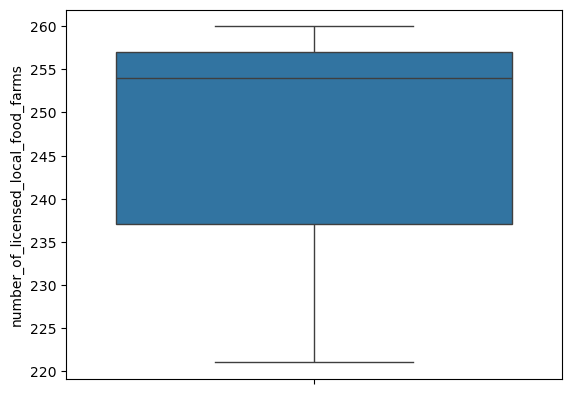

In [17]:
seaborn.boxplot(licensed_local_food_farm_dataframe["number_of_licensed_local_food_farms"])

<Axes: ylabel='land_based_seafood'>

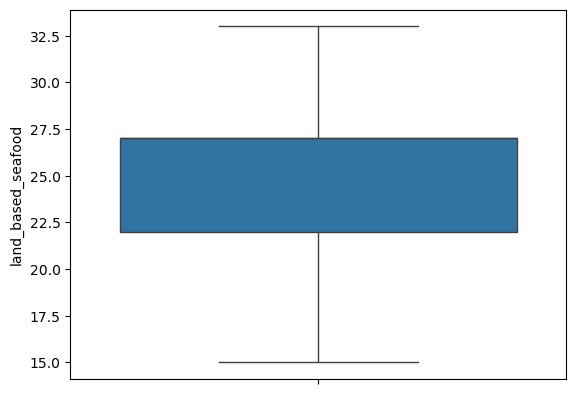

In [18]:
seaborn.boxplot(licensed_local_food_farm_dataframe["land_based_seafood"])

<Axes: ylabel='vegetables'>

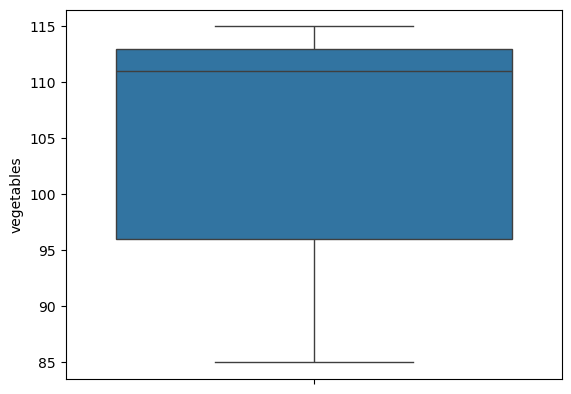

In [19]:
seaborn.boxplot(licensed_local_food_farm_dataframe["vegetables"])

## Exploratory Data Analysis

### Food Security and growing local capabilities to supply more local grown food in Singapore

This section focus on the Resilent Future pillar where the food security is the focal point in this analysis.

The pillar 'Resilient Future' in the SG Green Plan was to build up the national resilience and the ability to handle future challenges on climate change.
Strengthening Food Security is one of the key challenges Singapore faced and the target goal for 

- Resilient Future
    - Grow Local
        - Build the local production of agri-food industry that can have the capability and capacity to produce 30% of Singapore's nutritional needs locally and sustainably

#### Determine the current number of licensed food farm for the local food supply

In [20]:
licensed_local_food_farm_dataframe = licensed_local_food_farm_dataframe.astype({'year': 'str'}, copy=True)

In [21]:
licensed_local_food_farm_dataframe= licensed_local_food_farm_dataframe.sort_values(by="year", ascending=True)

In [22]:
licensed_local_food_farm_dataframe.columns

Index(['year', 'number_of_licensed_local_food_farms', 'sea_based_seafood',
       'land_based_seafood', 'vegetables', 'hen_shell_eggs', 'others'],
      dtype='object')

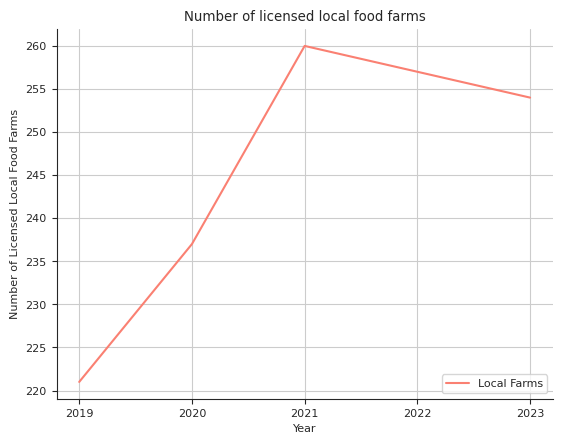

In [23]:
seaborn.set_style('ticks')
plt.rcParams.update({'font.size': 8})

number_of_licensed_local_food_farm_plot = seaborn.lineplot(data=licensed_local_food_farm_dataframe, y="number_of_licensed_local_food_farms", x="year", markers="o", color='salmon', label='Local Farms')

plt.title('Number of licensed local food farms')


# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)
 
# Remove the top and right spines
seaborn.despine()
number_of_licensed_local_food_farm_plot.set(xlabel="Year", ylabel="Number of Licensed Local Food Farms")
plt.show()

#### Breakdown of Different Local Licensed Farms 

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Licensed Local Food Farms (count)')]

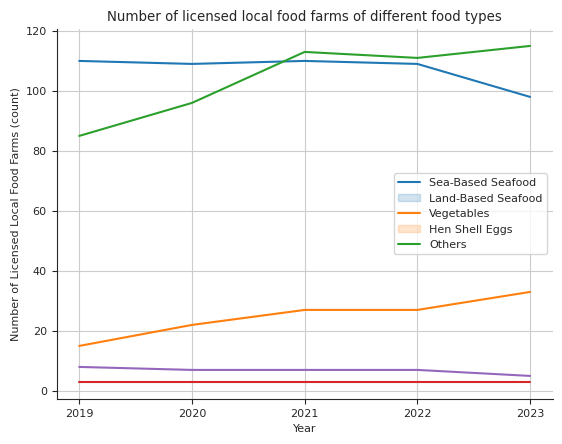

In [24]:
line_plot_dataframe_without_total = licensed_local_food_farm_dataframe[['year', 'sea_based_seafood', 'land_based_seafood', 'vegetables', 'hen_shell_eggs', 'others']]

licensed_local_food_farm_dataframe_plot = seaborn.lineplot(data=line_plot_dataframe_without_total.melt(id_vars=["year"]), x="year", y="value", hue="variable")

licensed_local_food_farm_dataframe_plot.legend_.set(visible=False)
# Add a legend
labels = ["Sea-Based Seafood", "Land-Based Seafood", "Vegetables", "Hen Shell Eggs", "Others"]
plt.legend(loc='right', labels=labels)

plt.title('Number of licensed local food farms of different food types')
#plt.xlabel('Year')
#plt.ylabel('Number of Licensed Local Food Farms')

# Add a grid
plt.grid(True)

# Remove the top and right spines
seaborn.despine()
licensed_local_food_farm_dataframe_plot.set(xlabel="Year", ylabel="Number of Licensed Local Food Farms (count)")



A slight decrease in the number of the licensed local food farms from 2021 to 2023 was due to rising operating cost and this creates construction challenges for building new farms.
Covid Pandemic also creates another challenge for farm owners and Scale drop disease becomes a challenge to fish farms

For the Sea-Based Seafood Farms faces serious challenges from 2022 to 2023 due to Scale Drop disease an endemic disease. There are many challenges for fish farming due to the prevention measures needed to setup before the fish farm owners is able to yield profits from the sales of the fishes in the fish farm.

Prevention measures such as ensuring the baby fishes or larvae can survive within the fish farm and preventing diseases from incoming fishes into the hatcheries of the fish farm.

#### Local Food Production

In [25]:
local_food_production_annual_dataframe_for_graph = local_food_production_annual_dataframe[["year","seafood_million_dollars", "vegetable_million_dollars", "hen_shell_eggs_million_dollars"]].head(5)

/tmp/ipykernel_1605/1770504478.py:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  catplot_handles = group_barplot._legend.legendHandles


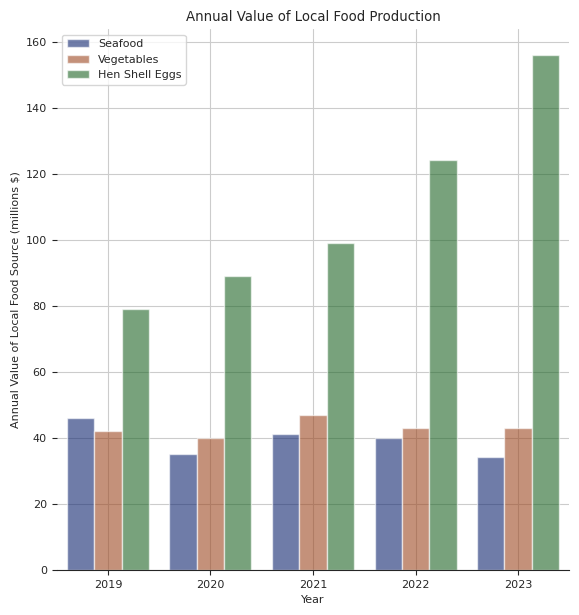

In [26]:
# https://stackoverflow.com/questions/77868243/combine-catplot-legend-with-other-legends-in-seaborn
labels = ["Seafood", "Vegetables", "Hen Shell Eggs"]
group_barplot = seaborn.catplot(
    data=local_food_production_annual_dataframe_for_graph.melt(id_vars=["year"]), kind="bar",
    x="year", y="value", hue="variable",
    errorbar="sd", palette="dark", alpha=.6, height=6
    )
legend=group_barplot._legend
group_barplot._legend.set(visible=False)
catplot_handles = group_barplot._legend.legendHandles
plt.legend(handles=catplot_handles, labels=labels)
plt.title("Annual Value of Local Food Production")
group_barplot.despine(left=True)
plt.grid(True)
group_barplot.set_axis_labels("Year", "Annual Value of Local Food Source (millions $)")


The annual value of local food production increases year by year for Hen Shell Eggs while the annual value for Vegetable and Seafood Local Food Production remains at a steady level between $35 million SGD to $47 million SGD.


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Weight (Million Tonnes)')]

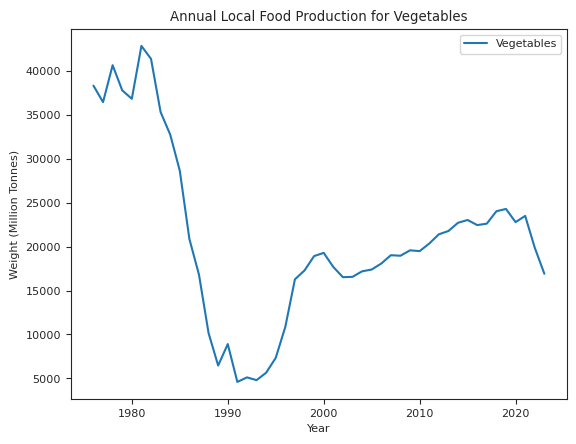

In [27]:
local_food_production_annual_dataframe[['year','local_production_of_vegetables_tonnes']]

local_production_of_vegetables_plot = seaborn.lineplot(data=local_food_production_annual_dataframe[['year','local_production_of_vegetables_tonnes']], x="year", y="local_production_of_vegetables_tonnes")


#local_production_of_vegetables_plot.legend_.set(False)
labels = ["Vegetables"]


plt.legend( labels=labels)
plt.title("Annual Local Food Production for Vegetables")

local_production_of_vegetables_plot.set(xlabel="Year", ylabel="Weight (Million Tonnes)")


The data is from 1976 to 2023 and the sharp drop for the Annual Local Vegetable production between 2022 to 2023 was probably due to the price of Local Produce was 30 per cent more than Import Vegetables and post COVID pandemic recovery

Text(0.5, 1.0, 'Annual Local Food Production excluding Vegetables')

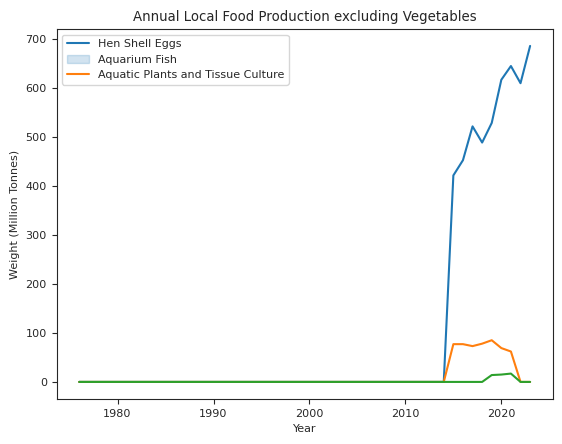

In [28]:
multiple_lineplot_local_food_production_annual_dataframe = local_food_production_annual_dataframe[[     "year" , 
       'local_production_of_hen_shell_eggs_million_tonnes',
       'local_production_of_aquarium_fish_million_pieces',
       'local_production_of_aquatic_plants_and_tissue_culture_plantlets_million_plants']].melt(id_vars=["year"])

labels = ["Hen Shell Eggs", "Aquarium Fish", "Aquatic Plants and Tissue Culture"]
local_food_production_plot = seaborn.lineplot(data=multiple_lineplot_local_food_production_annual_dataframe, x="year", y="value", hue="variable")
local_food_production_plot.legend_.set(visible=False)


local_food_production_plot.legend(labels=labels)
local_food_production_plot.set(xlabel="Year", ylabel="Weight (Million Tonnes)")
plt.title("Annual Local Food Production excluding Vegetables")



The local production of Hen Shell eggs saw an increase over the years from 2015 to 2023 of 62 % increase with the average of 6.8% increase per year.

The local production of Aquarium Fishes and Aquatic Plants and Tissue Culture has halted from 2022 to 2023 due to Scale Drop Disease. 
Aquarium fishes includes Sea Bass.  


https://www.straitstimes.com/singapore/research-programme-kicks-off-to-boost-singapore-s-fish-farming

#### Current Food Consumption from Local Source

![Screenshot 2024-08-15 at 12.33.06 PM.png](<attachment:Screenshot 2024-08-15 at 12.33.06 PM.png>)
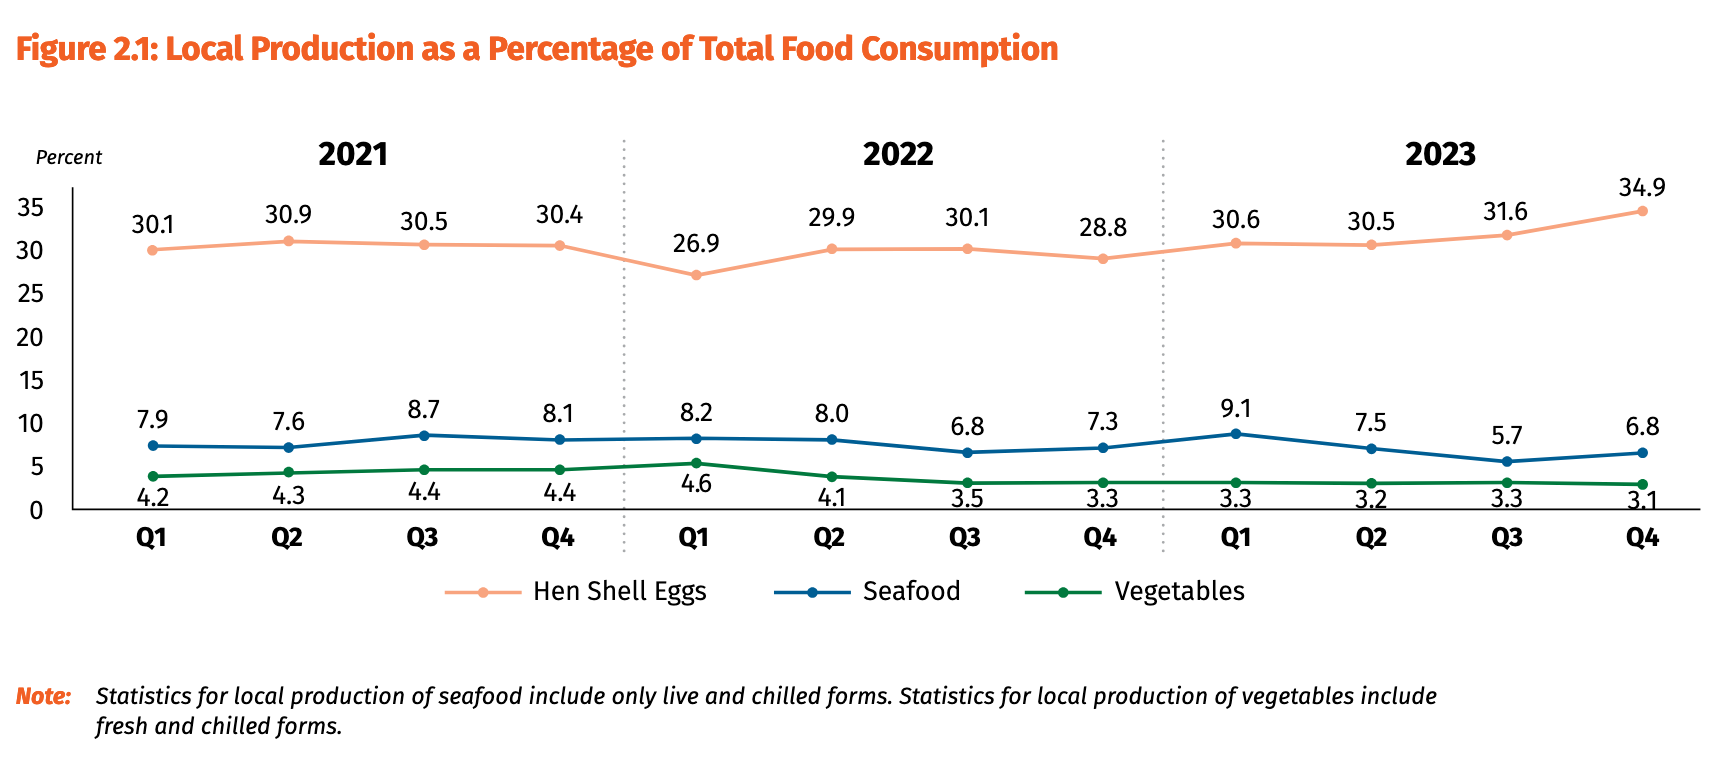

Due to the lack of raw data for Local Food Production and the data I have managed to obtain from Department of Statistics StatBuilder was an aggregated data. I went to search for more information from the Singapore Food Agency Publication.

This was the key information I was looking for to make up for the insight that the current dataset wasn’t able to provide even after data wrangling.

This insight will conclude that the current food supply where 30% came from Local production.


### Analysis of Green Energy on Solar Panel in HDB Residential Household

- Energy Reset
    - Green Energy
        - 1.5 Gigawatt-peak of electricity generation from solar panel can meet the annual electricity needs for about 260000 households

To provide an overview of the amount of energy needed for this country to function, 

In [29]:
solar_pv_installations_by_ura_planning_region_dataframe_residential = solar_pv_installations_by_ura_planning_region_dataframe[solar_pv_installations_by_ura_planning_region_dataframe["residential_status"] == "Residential"]

### Determining the Household electricity for residential properties

In [30]:
year_2021_solar_panel = solar_pv_installations_by_ura_planning_region_dataframe_residential[solar_pv_installations_by_ura_planning_region_dataframe_residential["year"] == 2021]

In [31]:
year_2021_solar_panel

,year,ura_planning_region,residential_status,num_solar_pv_inst,inst_cap_kwac,total_inst_cap_percent
131,2021,Central,Residential,490,5723.9,1.7
133,2021,East,Residential,242,2126.2,0.6
135,2021,North-East,Residential,616,2990.3,0.9
137,2021,North,Residential,57,524.7,0.2
139,2021,West,Residential,77,724.8,0.2


In [32]:
# How much increase of solar panel installation for residential region



In [33]:
#Show line chart

[Text(0.5, 0, 'Number of Solar PV Installed'),
 Text(0, 0.5, 'Installed Capacity (KWac)'),
 Text(0.5, 1.0, 'Scatterplot for Number of Solar PV installed and Installed Capacity (KWac)')]

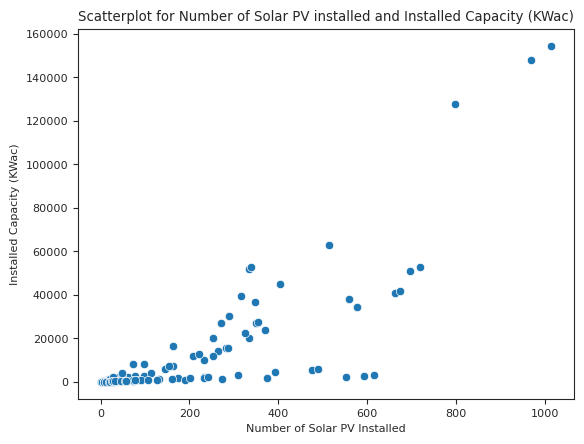

In [34]:
scatter_plot = seaborn.scatterplot(data=solar_pv_installations_by_ura_planning_region_dataframe, x="num_solar_pv_inst", y="inst_cap_kwac")

scatter_plot.set(xlabel ="Number of Solar PV Installed", ylabel = "Installed Capacity (KWac)", title ='Scatterplot for Number of Solar PV installed and Installed Capacity (KWac)')

<b>Checking the correlation between Number of Solar PV Installed and Installed Capacity KWac</b>

In [35]:
solar_pv_installations_by_ura_planning_region_dataframe[["num_solar_pv_inst", "inst_cap_kwac"]].corr()

,num_solar_pv_inst,inst_cap_kwac
num_solar_pv_inst,1.000000,0.801427
inst_cap_kwac,0.801427,1.000000


The relationship between Number of Solar PV Installed and Installed Capacity KWac has the correlation score of 0.80.
This is a strong positive association between Number of Solar PV Installed and Installed Capacity KWac.

Association between Peak System Demand and Installed Capacity KWac on Solar Panel

#### Electricity Generation by Month

In [36]:
electricity_generation_by_month_dataframe = electricity_generation_by_month_dataframe.sort_values(by="electricity_generation", inplace=False)

In [37]:
peak_system_demand_dataframe.melt(id_vars=["year", "month"])

,year,month,variable,value
0,2005,1,peak_system_demand_mw,5083
1,2005,2,peak_system_demand_mw,5285
2,2005,3,peak_system_demand_mw,5333
3,2005,4,peak_system_demand_mw,5408
4,2005,5,peak_system_demand_mw,5385
...,...,...,...,...
194,2021,3,peak_system_demand_mw,7397
195,2021,4,peak_system_demand_mw,7398
196,2021,5,peak_system_demand_mw,7562
197,2021,6,peak_system_demand_mw,7518


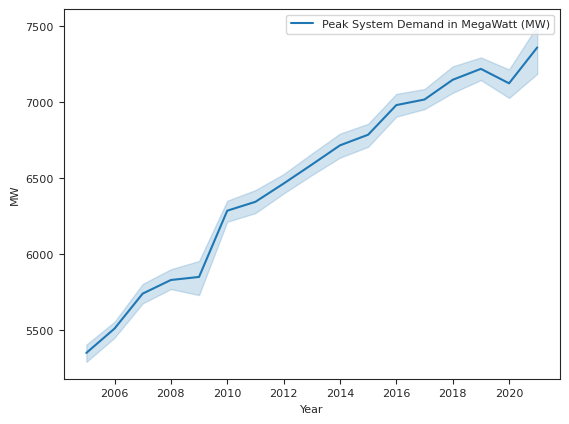

In [38]:
peak_system_demand_plot = seaborn.lineplot(data=peak_system_demand_dataframe.melt(id_vars=["year", "month"]), x="year", y="value", hue="variable")

peak_system_demand_plot.set(xlabel="Year", ylabel="MW")

peak_system_demand_plot.legend_.set(visible=False)

labels=["Peak System Demand in MegaWatt (MW)"]
peak_system_demand_plot.legend(labels=labels)


The Peak System Demand is currently at 7560 MegaWatt (MW). 

#### Electricity Generation by Month

In [39]:
electricity_generation_by_month_dataframe["month"].str.split(" ").str[1]

589    Feb
577    Feb
590    Jan
588    Mar
585    Jun
      ... 
20     Jul
0      Mar
22     May
5      Oct
10     May
Name: month, Length: 591, dtype: object

In [40]:
electricity_generation_by_month_dataframe["year"] = electricity_generation_by_month_dataframe["month"].str.split(" ").str[0]

electricity_generation_by_month_dataframe["month"] = electricity_generation_by_month_dataframe["month"].str.split(" ").str[1]


#electricty_generation in the metric of GWH

In [41]:
electricity_generation_by_month_dataframe[["year", "electricity_generation"]].groupby(by="year").sum()

,electricity_generation
year,
1975,4175.7
1976,4604.9
1977,5114.7
1978,5897.9
1979,6447.8
1980,6940.5
1981,7441.9
1982,7859.5
1983,8625.9


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Electricity Generation (GWh)')]

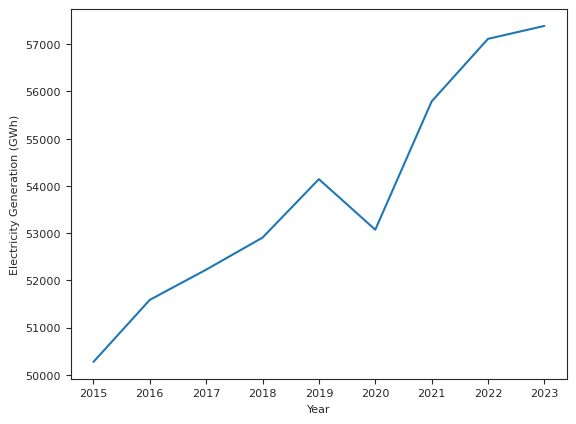

In [42]:

electricity_generation_lineplot_data = electricity_generation_by_month_dataframe[["year", "electricity_generation"]].groupby(by="year").sum().reset_index()
electricity_generation_lineplot_data = electricity_generation_lineplot_data.astype({'year': 'int32'})

electricity_generation_plot = seaborn.lineplot(data=electricity_generation_lineplot_data[(electricity_generation_lineplot_data["year"] >= 2015) & (electricity_generation_lineplot_data["year"] <= 2023)], x="year", y="electricity_generation")

electricity_generation_plot.set(xlabel="Year", ylabel="Electricity Generation (GWh)")


In [43]:
electricity_generation_lineplot_data[(electricity_generation_lineplot_data["year"] >= 2015) & (electricity_generation_lineplot_data["year"] <= 2023)]

,year,electricity_generation
40,2015,50271.6
41,2016,51586.6
42,2017,52225.8
43,2018,52904.8
44,2019,54142.3
45,2020,53071.6
46,2021,55788.2
47,2022,57113.7
48,2023,57387.9


The electricity Generation from 2015 is 50271.6 GWh to 2023 of 57387.9 GWh.

#### Total Final Energy Consumption By Energy Type and Sector 

In [44]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe

,year,sector,energy_products,consumption_ktoe
0,2009,Commerce and Services-related,Coal and Peat,0.0
1,2009,Commerce and Services-related,Crude Oil,0.0
2,2009,Commerce and Services-related,Electricity,1272.6
3,2009,Commerce and Services-related,Natural Gas,72.9
4,2009,Commerce and Services-related,Others,0.0
...,...,...,...,...
375,2020,Transport-Related,Natural Gas,2.0
376,2021,Households,Natural Gas,72.0
377,2020,Households,Natural Gas,76.2
378,2021,Others,Natural Gas,3.1


In [45]:

#1 toe = 11.63 megawatt-hours (MWh)

total_final_energy_consumption_by_energy_type_and_sector_dataframe["MWh"] = total_final_energy_consumption_by_energy_type_and_sector_dataframe["consumption_ktoe"] * 1000 * 11.63
total_final_energy_consumption_by_energy_type_and_sector_dataframe["GWh"] = total_final_energy_consumption_by_energy_type_and_sector_dataframe["consumption_ktoe"] * 11.63

#https://en.wikipedia.org/wiki/Tonne_of_oil_equivalent

In [47]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe[total_final_energy_consumption_by_energy_type_and_sector_dataframe["year"] >= 2015][["year","energy_products", "GWh"]]

,year,energy_products,GWh
180,2015,Coal and Peat,0.000
181,2015,Crude Oil,0.000
182,2015,Electricity,17481.053
183,2015,Natural Gas,1025.766
184,2015,Others,0.000
...,...,...,...
375,2020,Natural Gas,23.260
376,2021,Natural Gas,837.360
377,2020,Natural Gas,886.206
378,2021,Natural Gas,36.053


In [50]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe = total_final_energy_consumption_by_energy_type_and_sector_dataframe[total_final_energy_consumption_by_energy_type_and_sector_dataframe["year"] >= 2015][["year","energy_products", "GWh"]]

In [50]:
def modify_column_content(x) -> str:
    if x == "Coal and Peat":
        return "Coal And Peat"
    return x

In [52]:
new_energy_products = total_final_energy_consumption_by_energy_type_and_sector_dataframe["energy_products"].apply(modify_column_content)

In [53]:
new_energy_products

0      Coal And Peat
1          Crude Oil
2        Electricity
3        Natural Gas
4             Others
           ...      
375      Natural Gas
376      Natural Gas
377      Natural Gas
378      Natural Gas
379      Natural Gas
Name: energy_products, Length: 380, dtype: object

In [54]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe["energy_products"] = new_energy_products

In [55]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe["energy_products"].unique()

array(['Coal And Peat', 'Crude Oil', 'Electricity', 'Natural Gas',
       'Others', 'Petroleum Products'], dtype=object)

In [56]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe.dtypes

year                  int64
sector               object
energy_products      object
consumption_ktoe    float64
MWh                 float64
GWh                 float64
dtype: object

In [66]:
total_final_energy_consumption_by_energy_type_and_sector_dataframe

,year,sector,energy_products,consumption_ktoe,MWh,GWh
0,2009,Commerce and Services-related,Coal And Peat,0.0,0.0,0.000
1,2009,Commerce and Services-related,Crude Oil,0.0,0.0,0.000
2,2009,Commerce and Services-related,Electricity,1272.6,14800338.0,14800.338
3,2009,Commerce and Services-related,Natural Gas,72.9,847827.0,847.827
4,2009,Commerce and Services-related,Others,0.0,0.0,0.000
...,...,...,...,...,...,...
375,2020,Transport-Related,Natural Gas,2.0,23260.0,23.260
376,2021,Households,Natural Gas,72.0,837360.0,837.360
377,2020,Households,Natural Gas,76.2,886206.0,886.206
378,2021,Others,Natural Gas,3.1,36053.0,36.053


In [72]:
aggregated_data_for_pie_chart = total_final_energy_consumption_by_energy_type_and_sector_dataframe[["energy_products", "GWh"]].groupby(by="energy_products").sum().reset_index()

In [73]:
aggregated_data_for_pie_chart

,energy_products,GWh
0,Coal And Peat,23140.211
1,Crude Oil,0.000
2,Electricity,611821.736
3,Natural Gas,202986.531
4,Others,0.000
5,Petroleum Products,1295636.661


Text(0.5, 1.0, 'Proportion of Energy Consumption from Different type of Energy Source ')

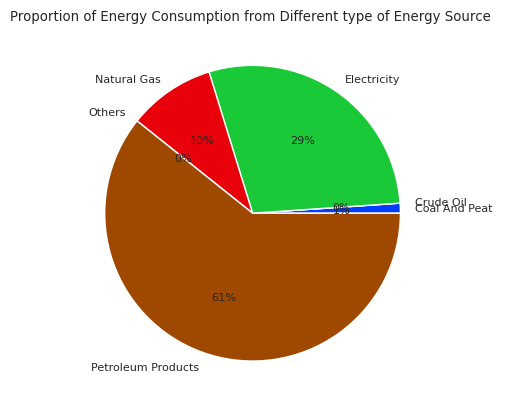

In [80]:
labels = aggregated_data_for_pie_chart["energy_products"].unique()


# define Seaborn color palette to use 
palette_color = seaborn.color_palette('bright') 
  
# plotting data on chart 
plt.pie(aggregated_data_for_pie_chart["GWh"], labels=labels, colors=palette_color, autopct='%.0f%%') 
plt.title("Proportion of Energy Consumption from Different type of Energy Source ")

#### Annual Solar PV Installed Capacity across all regions

In [74]:
solar_pv_installations_by_ura_planning_region_annual_dataframe = solar_pv_installations_by_ura_planning_region_dataframe[["year", "ura_planning_region", "inst_cap_kwac"]].groupby(by=["year"]).sum().reset_index()

In [58]:
solar_pv_installations_by_ura_planning_region_annual_dataframe[solar_pv_installations_by_ura_planning_region_annual_dataframe["year"] >= 2015]

,year,ura_planning_region,inst_cap_kwac
7,2015,CentralCentralEastEastNorth-EastNorth-EastNort...,45695.2
8,2016,CentralCentralEastEastNorth-EastNorth-EastNort...,96652.5
9,2017,CentralCentralEastEastNorth-EastNorth-EastNort...,117911.1
10,2018,CentralCentralEastEastNorth-EastNorth-EastNort...,160325.0
11,2019,CentralCentralEastEastNorth-EastNorth-EastNort...,271010.0
12,2020,CentralCentralEastEastNorth-EastNorth-EastNort...,330169.7
13,2021,CentralCentralEastEastNorth-EastNorth-EastNort...,341545.3


In [59]:
grouped_bar_chart_solar_pv_dataframe = solar_pv_installations_by_ura_planning_region_annual_dataframe[solar_pv_installations_by_ura_planning_region_annual_dataframe["year"] >= 2015].melt(id_vars=["year", "ura_planning_region"])

In [64]:
grouped_bar_chart_solar_pv_dataframe

,year,ura_planning_region,variable,value
0,2015,CentralCentralEastEastNorth-EastNorth-EastNort...,inst_cap_kwac,45695.2
1,2016,CentralCentralEastEastNorth-EastNorth-EastNort...,inst_cap_kwac,96652.5
2,2017,CentralCentralEastEastNorth-EastNorth-EastNort...,inst_cap_kwac,117911.1
3,2018,CentralCentralEastEastNorth-EastNorth-EastNort...,inst_cap_kwac,160325.0
4,2019,CentralCentralEastEastNorth-EastNorth-EastNort...,inst_cap_kwac,271010.0
5,2020,CentralCentralEastEastNorth-EastNorth-EastNort...,inst_cap_kwac,330169.7
6,2021,CentralCentralEastEastNorth-EastNorth-EastNort...,inst_cap_kwac,341545.3


[None]

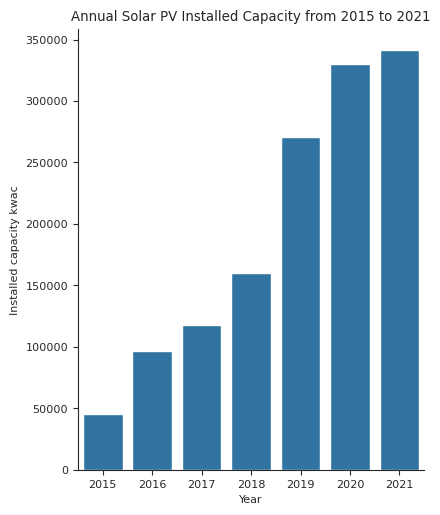

In [65]:
grouped_bar_chart_solar_pv = seaborn.catplot(data=grouped_bar_chart_solar_pv_dataframe, kind="bar", x="year", y="value", hue="ura_planning_region")

plt.title("Annual Solar PV Installed Capacity from 2015 to 2021")
grouped_bar_chart_solar_pv.set(xlabel="Year", ylabel="Installed capacity kwac")


grouped_bar_chart_solar_pv.legend.set(visible=False)

From this chart, there is an increasing value of Installed Capacity (KWac) from a total of installed capacity Kwac of 7146.2 to 12089.9.

KWac refers to Installed Capacity in Power Generation

KWac - The maximum amount of electricity that a generating station (also known as a power plant) can produce under specific conditions designated by the manufacturer.

#### Household Electricity Consumption

In [306]:
data_from_2018_to_2023 = household_electricity_consumption_by_dwelling_type_dataframe[household_electricity_consumption_by_dwelling_type_dataframe["year"] >= 2018]

In [309]:
annual_data_from_2018_to_2023 = data_from_2018_to_2023[data_from_2018_to_2023["month"] == "Annual"]

In [372]:
annual_data_from_2018_to_2023 = annual_data_from_2018_to_2023[(annual_data_from_2018_to_2023["DWELLING_TYPE"] != "Overall") & (annual_data_from_2018_to_2023["DWELLING_TYPE"] != "Public Housing") & (annual_data_from_2018_to_2023["DWELLING_TYPE"] != "Private Housing")]

In [373]:
dataframe_for_grouped_bar_chart = annual_data_from_2018_to_2023[["DWELLING_TYPE", "year", "consumption_GWh"]].melt(id_vars=["DWELLING_TYPE", "year"])

In [374]:
dataframe_for_grouped_bar_chart

,DWELLING_TYPE,year,variable,value
0,1-room / 2-room,2018,consumption_GWh,135.6
1,3-room,2018,consumption_GWh,747.1
2,4-room,2018,consumption_GWh,1755.1
3,5-room and Executive,2018,consumption_GWh,1583.9
4,Private Apartments and Condominiums,2018,consumption_GWh,1974.9
5,Landed Properties,2018,consumption_GWh,1012.9
6,Others,2018,consumption_GWh,22.2
7,1-room / 2-room,2019,consumption_GWh,150.0
8,3-room,2019,consumption_GWh,783.7
9,4-room,2019,consumption_GWh,1857.5


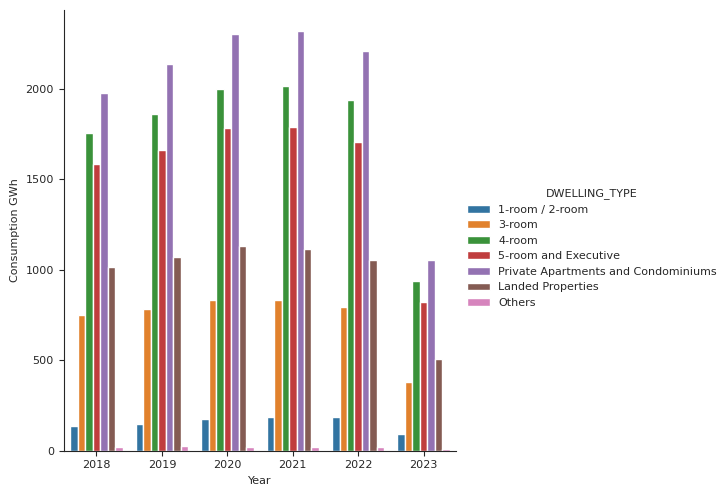

In [376]:
dataframe_for_grouped_bar_chart

group_bar_plot_household_energy_consumption = seaborn.catplot(data=dataframe_for_grouped_bar_chart, kind="bar", x="year", y="value", hue="DWELLING_TYPE")

group_bar_plot_household_energy_consumption.set(xlabel="Year", ylabel="Consumption GWh")


The decreased energy consumption could mean that COVID restriction is lax and people could go out more frequently which contributes to the reduced energy consumption.

Tengah smart energy town has Solar Photovoltaic panels installed in each building to power centralized cooling system.

https://www.hdb.gov.sg/about-us/hdbs-refreshed-roadmap-designing-for-life/tengah-showpiece/tengah-smart-energy-town

## Summary

The Solar PV electricity generation is likely to meet the demand of the Electricity needs in 2025 of 1.5 GWh 

In the data visualization from Singapore Food Statistics 2023, the local food production is already meeting the 30% nutrition needs in Singapore

There are challenges for Fish and Vegetable farm owners due to endemic disease or rising costs that obstruct the construction progress but there are certain avenue to seek help via Singapore AquaCulture Plan and Agri Food Hub 


## Reference

- https://www.greenplan.gov.sg/targets/ [1]
- https://www.greenplan.gov.sg/key-focus-areas/resilient-future/ [2]
- https://www.straitstimes.com/singapore/s-pore-vegetable-seafood-production-fell-in-2023-due-to-construction-challenges-inflation-sfa [3]
- https://www.sfa.gov.sg/docs/default-source/publication/sg-food-statistics/singapore-food-statistics-2023.pdf?sfvrsn=cac6f594_1 [4]
- https://www.greenplan.gov.sg/key-focus-areas/city-in-nature/
- https://www.greenplan.gov.sg/key-focus-areas/energy-reset/
- https://www.greenplan.gov.sg/key-focus-areas/green-economy/
- https://www.greenplan.gov.sg/key-focus-areas/resilient-future/
- https://www.greenplan.gov.sg/key-focus-areas/sustainable-living/
- https://www.greenplan.gov.sg/vision/
- https://www.ourfoodfuture.gov.sg/uplifting-aquaculture-industry/sg-aquaculture-plan/
- https://www.ourfoodfuture.gov.sg/master-planning-lck/ourvision/
- https://www.channelnewsasia.com/singapore/local-imported-vegetables-produce-farms-price-demand-3517356
- https://www.sfa.gov.sg/food-farming/sgfoodstory  


